# Top Games Rating Web Scarping Project

In [1]:
!pip install BeautifulSoup4 

import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

#### Website Page View Showcase.  Link in the below cell

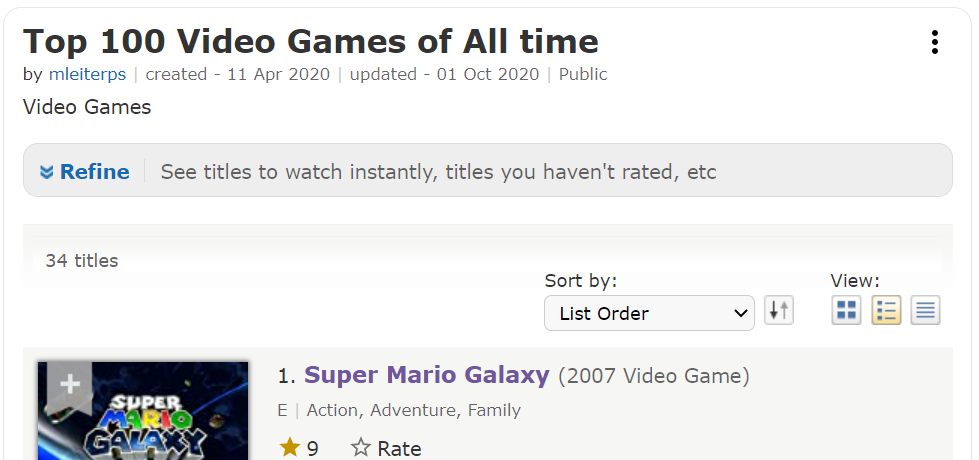

In [2]:
url_link = 'https://www.imdb.com/list/ls094225069/'   # Top 34 values page-1

In [3]:
Req  = requests.get(url_link)

In [4]:
Req.status_code #accepted 

200

In [5]:
page = BeautifulSoup(Req.content,'lxml')

In [6]:
Game_names = page.find_all('h3',class_='lister-item-header')

In [7]:
## here i using list comprehension instead of for loop

Game_names_list = [p.text[4:-19].strip() for p in Game_names] 

In [8]:
year = page.find_all('span',class_='lister-item-year text-muted unbold')

In [9]:
years = [p.text[1:-12] for p in year]

In [10]:
rating = page.find_all('div',class_='ipl-rating-star small')

In [11]:
len(rating)

34

In [12]:
rating[0]

<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">9.1</span>
</div>

In [13]:
sample = [p.text for p in rating[0].find_all('span',class_='ipl-rating-star__rating')]

sample

['9.1']

In [14]:
ratings = []

for i in range(len(rating)):
    a=[]
    for j in rating[i].find_all('span',class_='ipl-rating-star__rating'):
        a.append(j.text)
    ratings.append(','.join(a))    
    

In [15]:
Voting = page.find_all('p',class_='text-muted text-small')

In [16]:
len(Voting)

102

In [17]:
Voting[2]

<p class="text-muted text-small">
<span class="text-muted">Votes:</span>
<span data-value="5361" name="nv">5,361</span>
</p>

In [18]:
sample2 = [p.text for p in Voting[2]][3]

sample2

'5,361'

In [19]:
Votings =[]
i = 2

while i < len(Voting):
    d = [p.text for p in Voting[i]][3]
    Votings.append(d)
    i += 3
    

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame({'Year':years,'Names':Game_names_list,'Rating':ratings,'Votings':Votings})

In [22]:
df['Votings'] = df['Votings'].str.replace('[\,\,]','').astype(int)

In [23]:
df['Rating'] = df['Rating'].astype(float)

In [24]:
df.head()

#Note   - Zeruda no densetsu: Buresu obu za wairudo ( The Legend of Zelda: Breath of the Wild in english)

#       - Zeruda no densetu Kaze no takuto HD ( The Legend of Zelda: The Wind Waker HD)

,Year,Names,Rating,Votings
0,2007,Super Mario Galaxy,9.1,5361
1,2017,Zeruda no densetsu: Buresu obu za wairudo,9.5,7300
2,2011,Portal 2,9.4,15731
3,2013,Zeruda no densetsu: Kaze no takuto HD,9.0,1364
4,2002,Metroid Prime,8.9,1992


In [25]:
df.info() #Page-1 , 34 games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     34 non-null     object 
 1   Names    34 non-null     object 
 2   Rating   34 non-null     float64
 3   Votings  34 non-null     int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 1.1+ KB


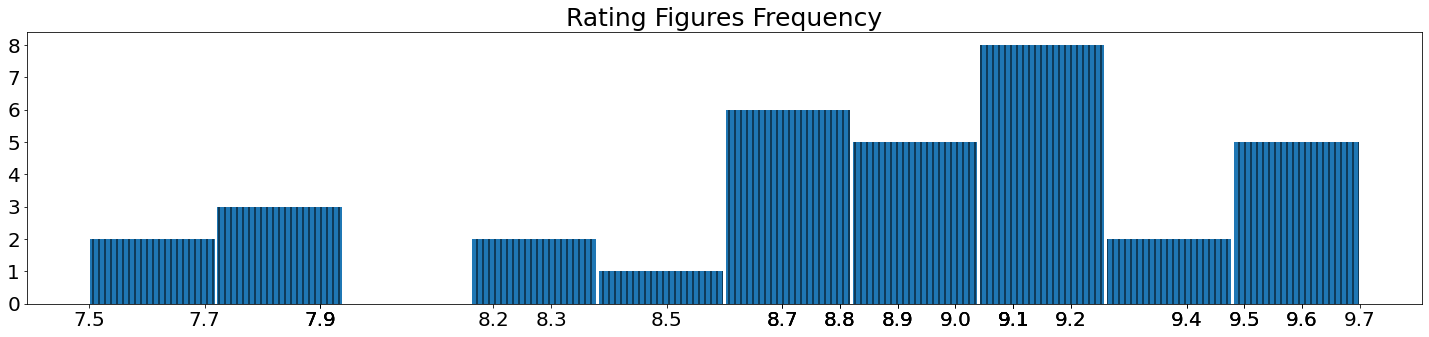

In [26]:
plt.figure(figsize=(25,5))

plt.title('Rating Figures Frequency',fontdict={'size':25})

plt.hist(x=df.Rating,histtype='bar',rwidth=0.98,hatch='||',)

plt.xticks(df.Rating,fontsize=20)
plt.yticks(fontsize=20);


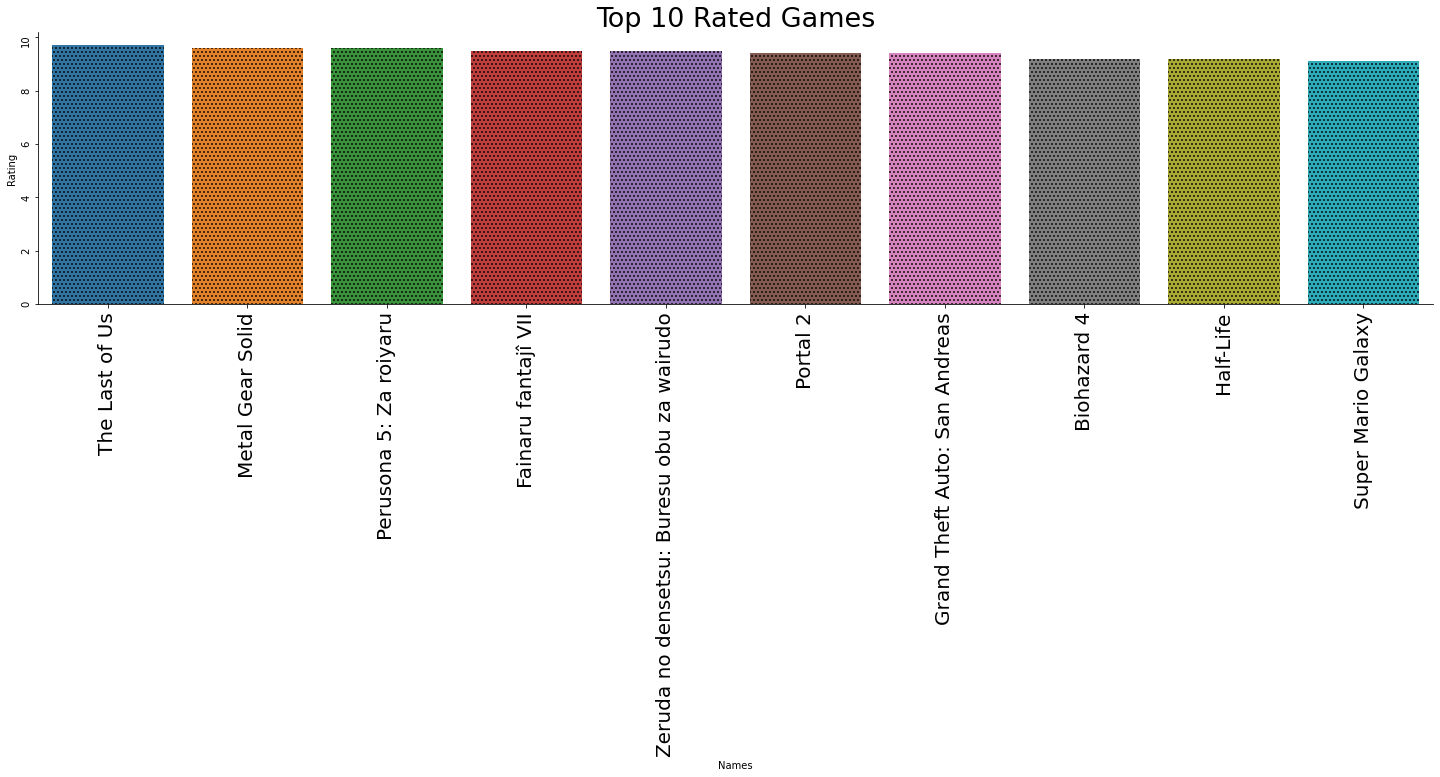

In [27]:
top_10_rated_games = df.sort_values('Rating', ascending =False).head(10)

plt.figure(figsize=(25,5))

plt.title('Top 10 Rated Games',fontdict={'size':27})

x= sns.barplot(x=top_10_rated_games.Names,y=top_10_rated_games.Rating,hatch='...')

plt.tick_params(labelrotation=90)

sns.despine()

plt.xticks(fontsize=20);

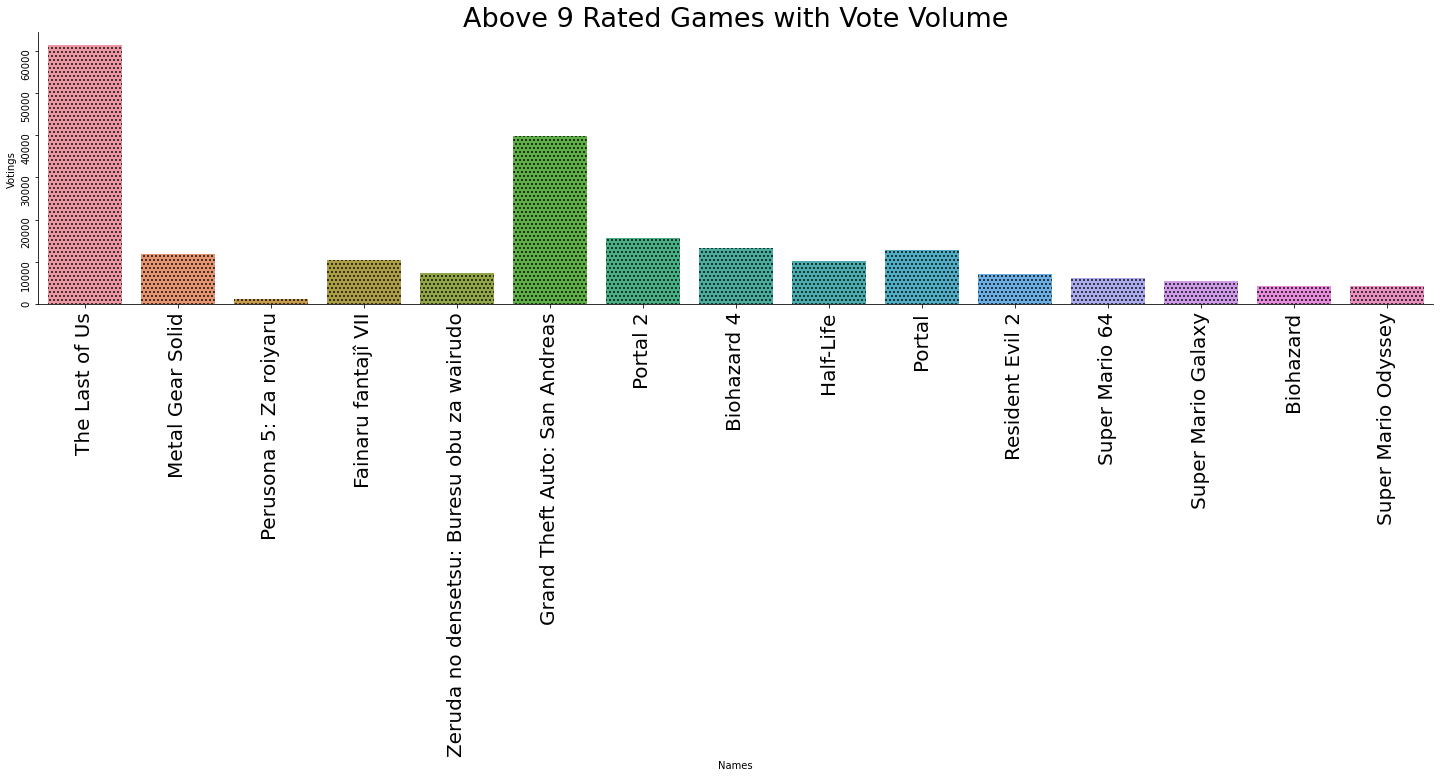

In [28]:
rating_9_games = df[df['Rating']>9][['Rating','Names','Votings']].sort_values(['Rating','Votings'],ascending=[0,0])


plt.figure(figsize=(25,5))

plt.title('Above 9 Rated Games with Vote Volume',fontdict={'size':27})

sns.barplot(x=rating_9_games.Names,y=rating_9_games.Votings,hatch='...')

plt.tick_params(labelrotation=90)

sns.despine()

plt.yticks(fontsize=10)
plt.xticks(fontsize=20);

## Box Chart View 

Clean Understanding Between Ratings and respective Volume of Voting

In [29]:
rating_9_games

,Rating,Names,Votings
22,9.7,The Last of Us,61347
7,9.6,Metal Gear Solid,11830
11,9.6,Perusona 5: Za roiyaru,1228
9,9.5,Fainaru fantajî VII,10464
1,9.5,Zeruda no densetsu: Buresu obu za wairudo,7300
18,9.4,Grand Theft Auto: San Andreas,39911
2,9.4,Portal 2,15731
29,9.2,Biohazard 4,13224
8,9.2,Half-Life,10223
16,9.1,Portal,12849
